In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [2]:
df=pd.read_csv('/Users/ujjwalpathak/Desktop/IMDB_PROJECT/movies.csv')

In [3]:
list(df)

['name',
 'rating',
 'genre',
 'year',
 'released',
 'score',
 'votes',
 'director',
 'writer',
 'star',
 'country',
 'budget',
 'gross',
 'company',
 'runtime']

In [4]:
#Looking if there are any empty Column
for c in df.columns:
    empty_c = np.mean(df[c].isnull())
    print ('{}---{}'.format(c,empty_c))


name---0.0
rating---0.010041731872717789
genre---0.0
year---0.0
released---0.0002608242044861763
score---0.0003912363067292645
votes---0.0003912363067292645
director---0.0
writer---0.0003912363067292645
star---0.00013041210224308815
country---0.0003912363067292645
budget---0.2831246739697444
gross---0.02464788732394366
company---0.002217005738132499
runtime---0.0005216484089723526


In [5]:
df.shape

(7668, 15)

In [6]:
df1 = df.dropna()

In [7]:
df1.shape

(5421, 15)

In [8]:
df1.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
df1=df1.sort_values(by=['gross'], inplace =False, ascending=False)
df1.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0


In [10]:
df2=df1.drop_duplicates()

In [11]:
df2.shape

(5421, 15)

In [12]:
df2['budget']=df2['budget'].astype('int64')
df2['gross']=df2['gross'].astype('int64')

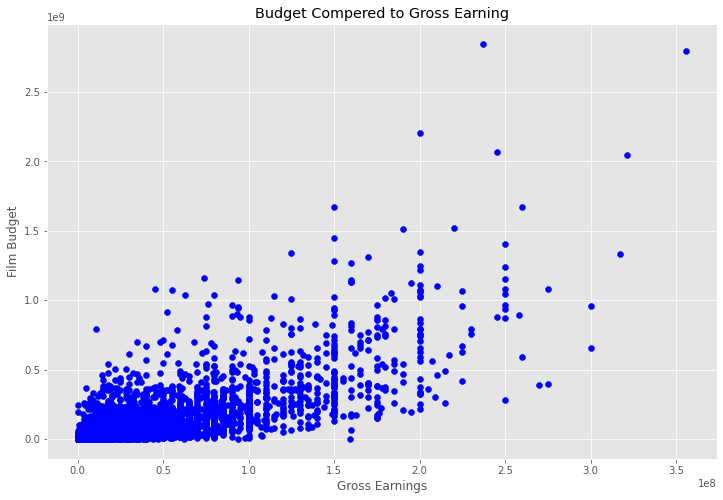

In [13]:
plt.scatter(x=df2['budget'],y= df2['gross'],c='blue')
plt.title('Budget Compered to Gross Earning')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

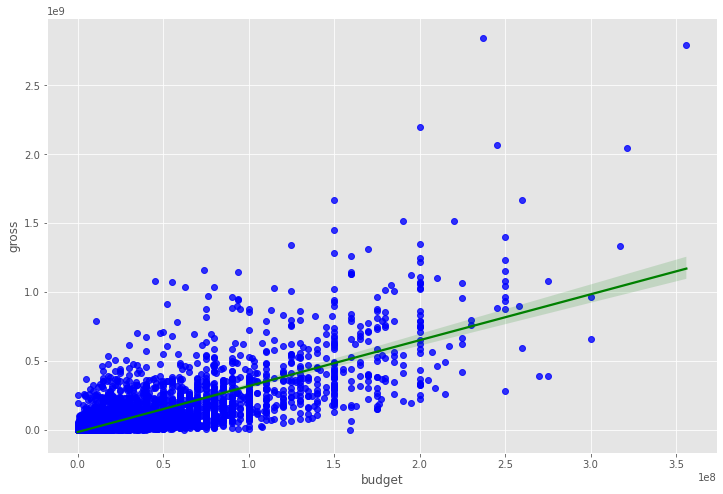

In [14]:
#Regression Plot
sns.regplot(x='budget',y='gross',data=df, scatter_kws={'color':'blue'}, line_kws={'color':'green'})

In [15]:
df2.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


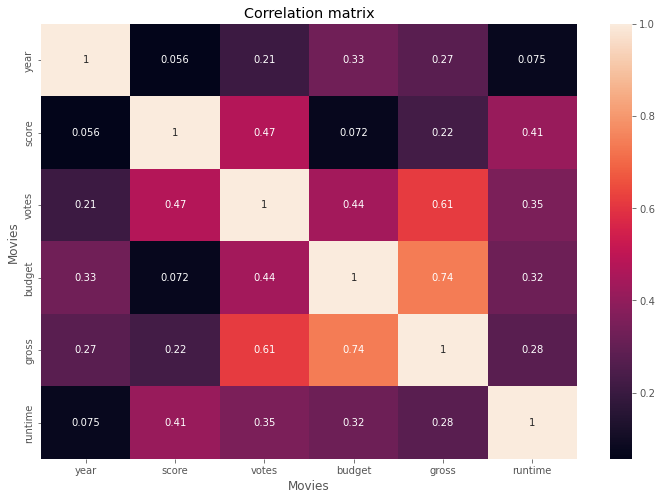

In [16]:
correlation_matrix= df2.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix')
plt.xlabel('Movies')
plt.ylabel('Movies')
plt.show('Movies')

In [17]:
df_number = df2

for col in df_number.columns:
    if(df_number[col].dtype == 'object'):
        df_number[col] = df_number[col].astype('category')
        df_number[col] = df_number[col].cat.codes
df_number.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0


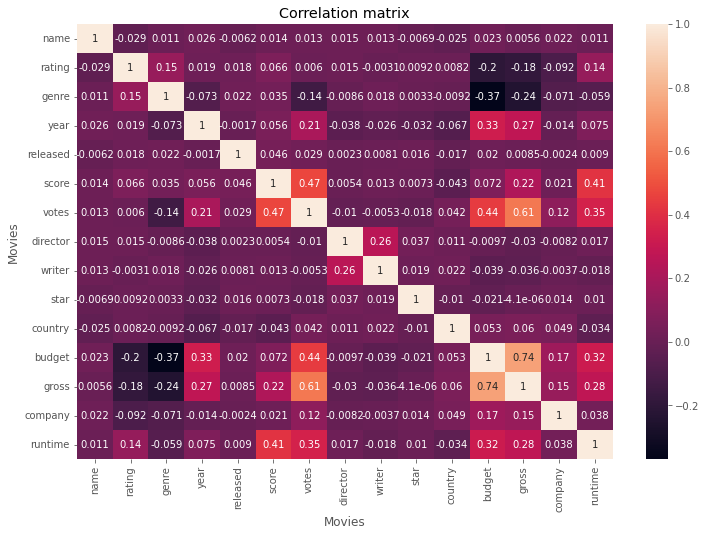

In [18]:
correlation_matrixN= df_number.corr()
sns.heatmap(correlation_matrixN, annot=True)
plt.title('Correlation matrix')
plt.xlabel('Movies')
plt.ylabel('Movies')
plt.show('Movies')

In [19]:
df_number.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108


In [20]:
correlation_m = df_number.corr()
corr_pairs = correlation_m.unstack()
pairs = corr_pairs.sort_values()

In [21]:
high_corr = pairs[(pairs)>0.5]
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64